### The Basic API Request

We will construct an API request to retrieve the average family size and median age for all states in the United States. The data will come from Summary File 1 of the 2010 Decennial Census.

Structure of a Census API Request:
"https://api.census.gov/data/2010/dec/sf1?get=NAME,P001001,&for=state:*"

Base URL
* Host = "https://api.census.gov/data"
* Year = "2010"
* Dataset = "dec/sf1"

Parameters
* get - List of variables
* for - Geography ofinterest

In [2]:
import requests
import pandas as pd

Specify appropriate string values for year and dataset to retrieve data for 2010 from Summary File 1 of the Decennial Census

In [2]:
# Build base URL
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

Construct get_vars, the list of Census variables to request, with the following variable names: "NAME", "P013001" (median age), "P037001" (average family size)

In [2]:
# Specify Census variables and other predicates
get_vars = ["NAME", "P013001", "P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

Output r.text using the print function

In [2]:
# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

We will load data from an API response object into a pandas data frame. We will assign user-friendly column names and convert the values from strings to appropriate data types.

In [14]:
# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Build a list col_names of 4 new column names: name, median_age, avg_family_size, and state

In [11]:
# Construct the data frame
col_names = ["name", "median_age", "avg_family_size", "state"]

Use the data frame constructor to create the data frame states. The data parameter should be set to `r.json()`, but use slicing to skip the first item, which contains the old column names

In [12]:
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

Use the astype method on each column to assign the correct data type.

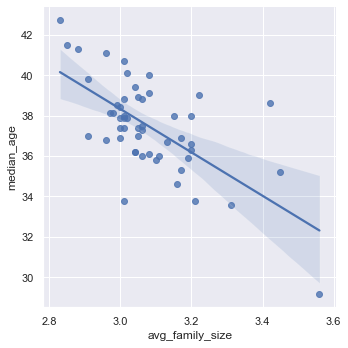

In [15]:
# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

PCT021005 - Male: Under 18 years: Institutionalized population: Correctional facilities for adults

PCT021015 - Male: Under 18 years: Institutionalized population: Juvenile facilities: Correctional facilities intended for juveniles

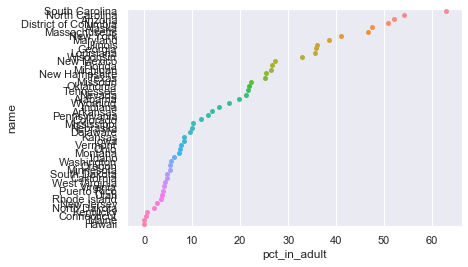

In [16]:
# Specify variables and execute API request
base_url = 'https://api.census.gov/data/2010/dec/sf1'
get_vars = ["NAME", "PCT021005", "PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct data frame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100*states["in_adult"] / (states["in_adult"]+ states["in_juvenile"])
states.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

